In [1]:
from fastai import *
from fastai.collab import * 
from fastai.tabular import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
user, item, title = 'userId','movieId','title'

In [4]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/Users/analysis.jinger/.fastai/data/movie_lens_sample')

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [6]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [7]:
y_range = [0,5.5]

In [8]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [9]:
learn.fit_one_cycle(3,5e-3)

epoch,train_loss,valid_loss,time
0,1.619946,0.903159,00:00
1,0.864582,0.675887,00:00
2,0.669438,0.671112,00:00


In [10]:
path = Path('../input/')
path

PosixPath('../input')

In [11]:
path = Config.data_path()/'ml-100k'
path

PosixPath('/Users/analysis.jinger/.fastai/data/ml-100k')

In [12]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
# -*- coding: utf-8 -*- 
movies = pd.read_csv(path/'u.item', delimiter = '|', encoding = 'latin-1', header=None,
                    names = [item,'title','date','N','url',*[f'g{i}' for i in range(19)]])

In [14]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
rating_movie = ratings.merge(movies[[item,title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [16]:
data = CollabDataBunch.from_df(rating_movie, seed = 42, valid_pct = 0.1, item_name=title)
data.show_batch()

userId,title,target
862,"Lost World: Jurassic Park, The (1997)",3.0
872,Twister (1996),4.0
214,True Romance (1993),4.0
786,"Killing Fields, The (1984)",5.0
682,Groundhog Day (1993),4.0


In [17]:
y_range = [0,5.5]

In [18]:
learn = collab_learner(data,n_factors=40,y_range=y_range,wd=1e-1)
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


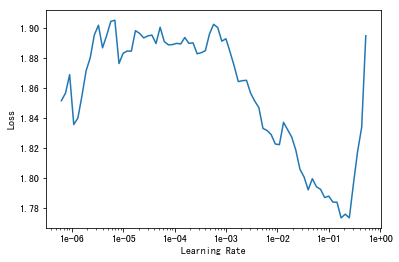

In [19]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [20]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.962776,0.945836,00:03
1,0.866833,0.884584,00:04
2,0.780481,0.833849,00:04
3,0.652318,0.814431,00:04
4,0.570442,0.812707,00:04


In [21]:
learn.save('dotprod')

In [22]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

In [23]:
g = rating_movie.groupby(title)['rating'].count()
g[:10]
# type(g): series 

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
Name: rating, dtype: int64

In [24]:
top_movies = g.sort_values(ascending = False).index.values[:1000]
top_movies[:20]
# movie_name = g.sort_index().index.values[:30]
# movie_name"

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)', 'Raiders of the Lost Ark (1981)', 'Godfather, The (1972)',
       'Pulp Fiction (1994)', 'Twelve Monkeys (1995)', 'Silence of the Lambs, The (1991)', 'Jerry Maguire (1996)',
       'Chasing Amy (1997)', 'Rock, The (1996)', 'Empire Strikes Back, The (1980)', 'Star Trek: First Contact (1996)'],
      dtype=object)

In [25]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape
movie_bias[:10]

tensor([0.5078, 0.4129, 0.3721, 0.4021, 0.0974, 0.1465, 0.1944, 0.3225, 0.2715,
        0.1710])

In [26]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
mean_ratings

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [28]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]
movie_ratings[:10]

[(tensor(0.5078), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4129), 'Contact (1997)', 3.8035363457760316),
 (tensor(0.3721), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.4021), 'Return of the Jedi (1983)', 4.007889546351085),
 (tensor(0.0974), 'Liar Liar (1997)', 3.156701030927835),
 (tensor(0.1465), 'English Patient, The (1996)', 3.656964656964657),
 (tensor(0.1944), 'Scream (1996)', 3.4414225941422596),
 (tensor(0.3225), 'Toy Story (1995)', 3.8783185840707963),
 (tensor(0.2715), 'Air Force One (1997)', 3.6310904872389793),
 (tensor(0.1710), 'Independence Day (ID4) (1996)', 3.438228438228438)]

In [29]:
item0 = lambda o:o[0]
# sort by bias

In [30]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3547),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3094),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2842), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2721), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2651), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2412), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2329), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2313), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2301), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2281), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2227), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2133), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2067), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2028), "Stephen King's The Langoliers (1995)", 2.413793103448276),
 (tensor(-0.202

In [31]:
sorted(movie_ratings,key=item0)[:10]

[(tensor(-0.3547),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3094),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2842), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2721), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2651), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2412), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2329), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2313), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2301), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2281), 'Striptease (1996)', 2.2388059701492535)]

In [32]:
sorted(movie_ratings,key=item0,reverse=True)[:14]

[(tensor(0.5980), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5791), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5477), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5303), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5197), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5078), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5041), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4942), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4845), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4821), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4707), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4705), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4703), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4673), 'Vertigo (1958)', 4.251396648044692)]